<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
df = pd.read_csv('data/job_listings.csv', usecols=['title', 'description'])
print(df.shape)
df.head()
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
from bs4 import BeautifulSoup
import requests

df['description'] = df['description'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

In [5]:
df.head(3)


,description,title
0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level


In [6]:
#remove extra character
df['description'] = df['description'].str.replace("b'", '')
df['description'] = df['description'].str.replace ('b"', '')
df['description'] = df['description'].str.replace ('\n', '')
df['description'] = df['description'].str.lower().str.strip()

In [7]:
df.sample(7)

,description,title
365,come work for us!\nwe are looking for dedicate...,Data Scientist
119,the data scientist role will be instrumental i...,Data Scientist
419,bachelor\xe2\x80\x99s or master\xe2\x80\x99s d...,Data Scientist - Delphi
416,"los gatos, california\nscience and analytics\n...",Senior Data Scientist
278,"temporary, internshipjob description\nibm mark...","IBM Marketing PhD Data Scientist Intern, Summe..."
52,the challenge\nadobe is looking for a senior d...,Senior Data Scientist
383,overview\nour data science department is seeki...,Associate Data Scientist


In [8]:
df['description'] = df['description'].str.replace(r'(https?:\/\/.*[\r\n]*)', ' ')

In [9]:
df['description'].value_counts().to_frame()

description
about the company\n\ncivis analytics is a techn...            3
minimum qualifications:\nmaster's degree in ope...            3
we\'re looking for data scientists who are pass...            3
you will collaborate with the brightest technic...            3
clinical data scientist\njob locations (all) | ...            2
...                                                         ...
bachelor or master's degree in highly quantitat...            1
wanted: a mission-driven professional with expe...            1
job description\n\nas a data scientist at squar...            1
the communications, information, and navigation...            1
part-time, internshipsummary:\n\n\nsierra nevad...            1

[356 rows x 1 columns]

## 2) Use Spacy to tokenize the listings 

In [10]:
nlp = spacy.load("en_core_web_lg")


In [11]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'science','\n\n',':\n'])
df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) if (token not in STOP_WORDS) and (token.is_punct != True)])
df.sample(5)
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,description,title,tokens
203,proficiency in synthesizing and interpreting d...,Sr Data Scientist,"[proficiency, in, synthesize, and, interpret, ..."
73,description as part of the nyc innovation team...,Junior Data Scientist,"[description, as, part, of, the, nyc, innovati..."
211,"commissionat red hat, we connect an innovative...",Data Scientist,"[commissionat, red, hat, -PRON-, connect, an, ..."
62,business unit introduction:\n\nthis position i...,Data Scientist - Machine Learning,"[business, unit, introduction:\n\nthis, positi..."
226,contractjob description\n\ntitle : data scient...,Data Scientist (Forecasting),"[contractjob, description\n\ntitle, data, scie..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [18]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

#remove domain specific word
vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['description'])

# Get sparse dtm
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.sample(5)

,00,000,02115,03,0356,04,062,06366,10,100,1000,1001,1008,100k,100x,105,1079302,1082692,10b,10ms,10x,11,112,114157802,12,120,125,126,130,1324b,138,14,140,15,150,15000,159m,16,1605,165,169334br,17,170,17b,18,180,180008jq,18b,19,190,190007ji,19000bn4,19000c1k,19004162,1901744,1904,1904labs,1905,19050,1938,1944,1967,1971,1975,1979,1988,199,1994,1999,1b,1strategy,1tb,20,200,2000,200020183,200041695,2004,2008,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2050,21,210,2145,24,24m,25,250,25256,26,260,...,x9c,x9cbang,x9cbest,x9cbig,x9cchristmas,x9ccustomer,x9cget,x9chave,x9chr,x9cinnovate,x9clive,x9cmachine,x9cmake,x9cpassion,x9cpeople,x9cplant,x9cpragmatism,x9cprovide,x9cquality,x9creasonable,x9crivr,x9cscientific,x9cscorecards,x9cstem,x9cstorytelling,x9csubject,x9csurge,x9cteam,x9cthe,x9ctop,x9ctraditional,x9cvirtual,x9cwe,x9cwhole,x9cwhy,x9cwin,x9cwork,x9cwow,x9cwowing,x9d,xa0,xa2,xa6,xa6and,xa6apple,xa6curious,xa6protect,xa6rapidly,xa7,xa8ve,xa9,xa9al,xa9cor,xac,xae,xafve,xb7,xb7experience,xb7identify,xb7knowledge,xbb,xbf,xbox,xc2,xc3,xe2,xef,xgboost,xpo,yards,year,yeara,yearas,yearcollects,yeardescription,yearjob,yearlrs,years,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yeti,yield,york,young,youtube,yrs,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,2,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [13]:
#sum_words = dtm.sum(axis=0) 
wc_top20= dtm.sum(axis=0).sort_values(ascending=False)[:20]
wc_top20

data           4273
xe2            1384
x80            1371
experience     1190
business       1164
team            935
work            925
science         920
learning        871
analytics       710
skills          663
analysis        658
machine         653
nexperience     601
models          580
x99s            558
product         557
statistical     542
new             511
solutions       509
dtype: int64

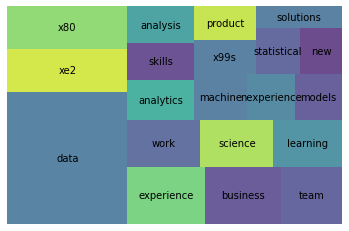

In [14]:
#Visualization
import squarify
import matplotlib.pyplot as plt
squarify.plot(sizes=wc_top20.values, label=wc_top20.index[:20], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [24]:
print(df.description)

0      job requirements:\nconceptual understanding in...
1      job description\n\nas a data scientist 1, you ...
2      as a data scientist you will be working on con...
3      $4,969 - $6,756 a monthcontractunder the gener...
4      location: usa \xe2\x80\x93 multiple locations\...
                             ...                        
421    about us:\nwant to be part of a fantastic and ...
422    internshipat uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yeara million people a y...
424    senior data scientist\njob description\n\nabou...
425    cerner intelligence is a new, innovative organ...
Name: description, Length: 426, dtype: object


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,04,10,100,1079302,11,12,125,15,17,18,180,19,1strategy,20,200,2012,2013,2015,2017,2018,2019,2020,24,25,30,300,30328,35,36,3rd,3x,40,401,401k,42,43,45,4g,50,500,55,59,5g,60,600,70,700,75,80,800,90,aa,ab,ab1,abernathy,abilities,ability,able,absence,absolutely,abstract,abundant,academic,academics,accelerate,accelerating,accept,accepted,accepting,access,accessibility,accessible,accommodation,accommodations,accomplish,accomplished,accomplishment,accordance,according,account,accountability,accountable,accounting,accounts,accredited,accuracy,accurate,accurately,achieve,achieving,acquire,acquisition,acquisitions,act,action,actionable,actions,activate,activation,...,workers,workflow,workflows,workforce,working,workings,workload,workplace,works,workshops,workspace,world,worldline,worldwide,worth,wrangler,wrangling,write,writing,written,wwe,www,x80,x81nd,x82,x83,x84,x93,x93august,x93minorities,x94,x94and,x94including,x94is,x94it,x94supporting,x94the,x94to,x94we,x98,x98big,x98real,x98think,x99,x99d,x99ll,x99re,x99s,x99t,x99ve,x9c,x9cbang,x9cbest,x9cbig,x9ccustomer,x9clive,x9cmachine,x9cmake,x9cplant,x9cquality,x9crivr,x9csurge,x9cteam,x9ctraditional,x9cwhole,x9cwhy,x9cwork,x9d,xa0,xa2,xa6,xa7,xac,xae,xb7,xbb,xbox,xc2,xc3,xe2,xef,xgboost,xpo,year,yeara,yearcollects,yeardescription,years,yearsummary,yearthe,yes,yeti,york,young,yrs,zenreach,zero,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.127543,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.141293,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060784,0.0,0.0,0.0,0.0,0.0,0.0,0.044128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056959,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.043158,0.0,0.0,0.0,0.0,0.0,0.0,0.046231,0.0,0.0,0.0,0.0,0.0,0.000000,0.084705,0.030171,0.0,0.0,0.139055,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073924,0.0,0.0,0.079219,0.041038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106687,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.138717,0.0,0.0,0.0,0.040543,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.112819,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.069097,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000

In [30]:
from spacy.tokenizer import Tokenizer
from tokenize import tokenize


# Tunning Parameters
#nlp.Defaults.stop_word => spacy stop word
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                       tokenizer=tokenize,
                       min_df=5, # words appears in atleast 5 document
                       ngram_range=(1,2), # 
                       max_df=.80, # if words appear in the atleast 80% of the document ignore it 
                       max_features=5000)

# Create a vocabulary and get word counts per document
print(type(tfidf.fit_transform))
dtm_tfidf = tfidf.fit_transform(df['description']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm_tfidf.head()





# # Create a vocabulary and get word counts per document
# dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# # Print word counts

# # Get feature names to use as dataframe column headers
# dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# # View Feature Matrix as DataFrame
# dtm.head()

<class 'method'>


TypeError: 'str' object is not callable

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_tfidf_df)

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 